In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will create an SGD class with methods that we will use while updating the parameters, fitting the training data set, and predicting the new test data. The methods we will be using are as :<br><br>
The first line imports the NumPy library, which is used for numerical computations in Python.Define the SGD class:<br><br>
1)The class SGD encapsulates the Stochastic Gradient Descent algorithm for training a linear regression model.<br><br>
2)Then we initialize the SGD optimizer parameters such as learning rate, number of epochs, batch size, and tolerance. It also initializes weights and bias to None.<br><br>
3)predict function: This function computes the predictions for input data X using the current weights and bias. It performs matrix multiplication between input X and weights, and then adds the bias term.<br><br>
4)mean_squared_error function: This function calculates the mean squared error between the true target values y_true and the predicted values y_pred.<br><br>
5)gradient function: This computes the gradients of the loss function with respect to the weights and bias using the formula for the gradient of the mean squared error loss function.<br><br>
6)fit method: This method fits the model to the training data using stochastic gradient descent. It iterates through the specified number of epochs, shuffling the data and updating the weights and bias in each epoch. It also prints the loss periodically and checks for convergence based on the tolerance.<br><br>
&emsp; (i)it calculates gradients using a mini-batch of data (X_batch, y_batch). This aligns with the stochastic nature of SGD.<br>
&emsp; (ii)After computing the gradients, the method updates the model parameters (self.weights and self.bias) using the learning rate and the calculated gradients. This is consistent with the parameter update step in SGD.<br>
&emsp; (iii)The fit method iterates through the entire dataset (X, y) for each epoch. However, it updates the parameters using mini-batches, as indicated by the nested loop that iterates through the dataset in mini-batches (for i in range(0, n_samples, self.batch_size)). This reflects the stochastic nature of SGD, where parameters are updated using a subset of the data.

In [42]:
class SGD:
    def __init__(self, lr = 0.01, epochs = 1000, batch_size = 32, tol = 1e-3):
        self.learning_rate = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.tolerance = tol
        self.weights = None
        self.bias = None
        
    def predict(self,X):
        return np.dot(X,self.weights) + self.bias
    
    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    def gradient(self, X_batch, y_batch):
        y_pred = self.predict(X_batch)
        error = y_pred - y_batch
#         gradient_weights = 2*np.dot(X_batch.T,error)/X_batch.shape[0]
#         gradient_bias = 2*np.mean(error)
#         Upper 2 lines of codes also give same result but for uniformity we use:
        gradient_weights = (np.dot(y_pred-y_batch,X_batch)*2)/len(y_batch)
        gradient_bias = (np.sum(y_pred - y_batch)*2)/len(y_batch)
        return gradient_weights, gradient_bias
    
    def fit(self,X,y):
        np.random.seed(42)
        n_samples, n_features = X.shape
        self.weights= np.random.randn(n_features)
        self.bias = np.random.randn()
        gd_iterations_df = pd.DataFrame(columns = ['iteration','cost'])
        result_idx = 0
        for epoch in range(self.epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(0,n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]
                gradient_weights, gradient_bias = self.gradient(X_batch,y_batch)
                self.weights -= self.learning_rate*gradient_weights
                self.bias -= self.learning_rate*gradient_bias
            if epoch%10 ==0:
                y_pred = self.predict(X)
                loss = self.mean_squared_error(y,y_pred)
#                 print(f"Epoch {epoch}: Loss {loss}")
                gd_iterations_df.loc[result_idx] = [epoch,loss]
                result_idx = result_idx + 1
            if np.linalg.norm(gradient_weights) < self.tolerance:
                print("Convergence reached.")
                break
        return gd_iterations_df,self.weights, self.bias

If batch size is 1 then SGD class will act as Stochastic Gradient Descent Optimizer and if batch size is greater than 1 then MIni batch gradient descent will be used.

In [43]:
np.random.seed(42)
# Create random dataset with 100 rows and 5 columns
X = np.random.randn(100, 5)
# create corresponding target value by adding random noise in the dataset
y = np.dot(X, np.array([1, 2, 3, 4, 5])) + np.random.randn(100) * 0.1

In [76]:
# Create an instance of the SGD class
model = SGD(lr=0.001, epochs=1000,
            batch_size=32, tol=1e-3)
gd_iterations_df,w,b=model.fit(X,y)
# Predict using predict method from model
y_pred = np.dot(X,w)+b
# y_pred

In [46]:
gd_iterations_df[0:20]

,iteration,cost
0,0.0,49.179966
1,10.0,40.988445
2,20.0,34.355033
3,30.0,28.763285
4,40.0,23.230159
5,50.0,19.427927
6,60.0,16.317886
7,70.0,13.798679
8,80.0,11.542546
9,90.0,9.688717


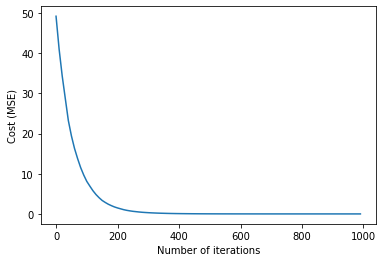

In [47]:
plt.plot(gd_iterations_df["iteration"],gd_iterations_df["cost"])
plt.xlabel("Number of iterations")
plt.ylabel("Cost (MSE)")
plt.show()

Convergence reached.
Convergence reached.


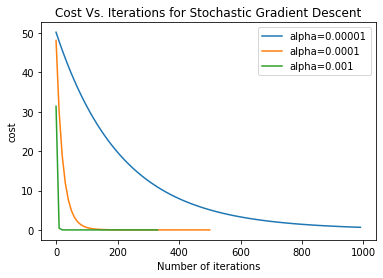

In [86]:
model1 = SGD(lr=0.00001, epochs=1000,batch_size=1, tol=1e-3)
alpha_df_1,w,b=model1.fit(X,y)
model2 = SGD(lr=0.0001, epochs=1000,batch_size=1, tol=1e-3)
alpha_df_2,w,b=model2.fit(X,y)
model3 = SGD(lr=0.001, epochs=1000,batch_size=1, tol=1e-3)
alpha_df_3,w,b=model3.fit(X,y)
plt.plot(alpha_df_1["iteration"],alpha_df_1["cost"],label="alpha=0.00001")
plt.plot(alpha_df_2["iteration"],alpha_df_2["cost"],label="alpha=0.0001")
plt.plot(alpha_df_3["iteration"],alpha_df_3["cost"],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for Stochastic Gradient Descent')
plt.show()

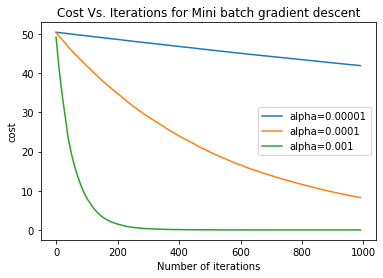

In [87]:
model1 = SGD(lr=0.00001, epochs=1000,batch_size=32, tol=1e-3)
alpha_df_1,w,b=model1.fit(X,y)
model2 = SGD(lr=0.0001, epochs=1000,batch_size=32, tol=1e-3)
alpha_df_2,w,b=model2.fit(X,y)
model3 = SGD(lr=0.001, epochs=1000,batch_size=32, tol=1e-3)
alpha_df_3,w,b=model3.fit(X,y)
plt.plot(alpha_df_1["iteration"],alpha_df_1["cost"],label="alpha=0.00001")
plt.plot(alpha_df_2["iteration"],alpha_df_2["cost"],label="alpha=0.0001")
plt.plot(alpha_df_3["iteration"],alpha_df_3["cost"],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for Mini batch gradient descent')
plt.show()

Stochastic Gradient Descent (SGD):<br>
In SGD, the model’s parameters (weights and biases) are updated after processing one training example at a time.<br>
Each iteration (or epoch) of SGD involves randomly selecting a single data point from the training dataset and using it to compute the gradient of the loss function with respect to the model parameters.<br>
The update is then performed based on this gradient, adjusting the model parameters slightly in the direction that reduces the loss.<br><br>
Advantages of SGD:<br>
Faster Convergence: Because SGD updates the model more frequently (after each data point), it often converges faster than traditional batch gradient descent. (Which can be seen from the results)<br>
Escape Local Minima: The frequent updates allow the model to escape local minima more effectively.<br><br>
Disadvantages of SGD:<br>
High Variance: Since each update is based on a single data point, the gradient estimate can be noisy, leading to high variance in the parameter updates.<br>
Slower Convergence for Smooth Loss Functions: For smooth loss functions, SGD may take longer to converge due to the noisy updates.

Mini-Batch Gradient Descent:<br>
In practice, a compromise between SGD and batch gradient descent is often used: mini-batch gradient descent.<br>
Mini-batch SGD processes a small subset (mini-batch) of the training data at a time (typically with a batch size greater than 1 but smaller than the entire dataset).<br>
This strikes a balance between the advantages of both SGD and batch gradient descent.<br><br>
Choosing the Batch Size:
The choice of batch size depends on factors such as the dataset size, available memory, and computational resources.
A common default is a batch size of 32.<br>
Larger batch sizes provide more stable gradient estimates but require more memory and slower updates.<br>
Smaller batch sizes introduce more noise but allow faster updates.

##### In summary, while SGD indeed uses a batch size of 1, mini-batch gradient descent (with a small batch size) is often preferred in practice for better convergence and computational efficiency